Haberman Dataset

Downloaded from  "https://drive.google.com/file/d/1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2/view?usp=sharing"

To classify status based on age, year and nodes

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [121]:
hab = pd.read_csv("D:\haberman.csv")

In [122]:
hab.shape

(306, 4)

In [123]:
print(hab.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')



Columns used "Age, Year and Nodes" to classify the Status

In [124]:
hab["status"].value_counts() 

1    225
2     81
Name: status, dtype: int64

Looks like an imbalanced dataset

In [213]:
hab.status = hab.status.apply(str)
hab["status"] = hab["status"].map({"1":"One","2":"Two"})


Converted status integer to string because the plots might consider status as a variable

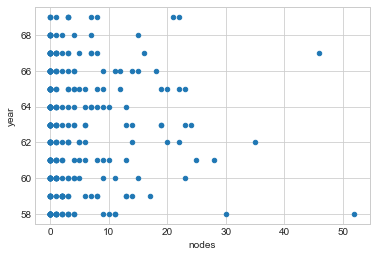

In [127]:
hab.plot(kind="scatter", x="nodes",y="year")
plt.show()

Looks like a lot of data points between node 0-25, corresponding to year between 58-66

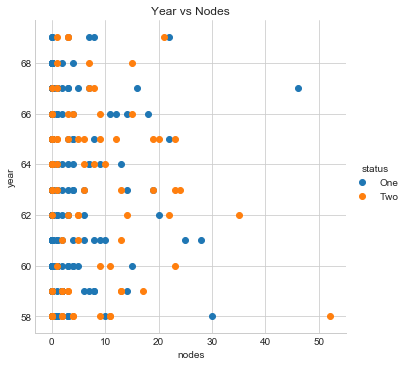

In [202]:
sns.set_style("whitegrid")
sns.FacetGrid(hab,hue="status",size=5).map(plt.scatter, "nodes","year").add_legend()
plt.title("Year vs Nodes")
plt.show()

Looks like they cannot be classified easily, so lets try it out for other pair of axes. Maybe since there are just 3 columns a total of 3 pairs of graphs that can be generated using pair plots

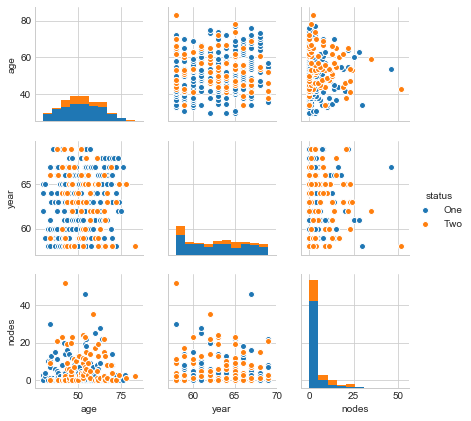

In [204]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(hab,hue="status",size=2);

plt.show()

Looks like from all the graphs its hard to write a model to classify the data points as everything is mixed up.



C:\Users\jayacharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jayacharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


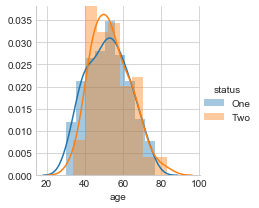

In [205]:
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(hab,hue="status",size=3).map(sns.distplot,"age").add_legend()
plt.show()

C:\Users\jayacharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jayacharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


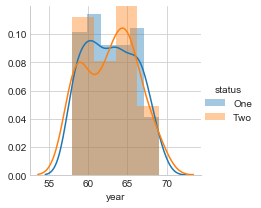

In [134]:
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(hab,hue="status",size=3).map(sns.distplot,"year").add_legend()
plt.show()

C:\Users\jayacharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jayacharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


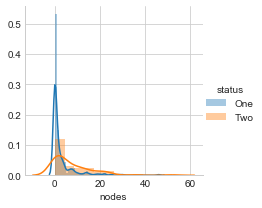

In [135]:
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(hab,hue="status",size=3).map(sns.distplot,"nodes").add_legend()
plt.show()

Of the plotted histograms and the pdfs corresponding to age,year and nodes, we can say that classification is really hard,
if we have to make a model out of it, the only way is to compare the histogram,pdf corresponding to the nodes, we can write a model for between 0 and 5 nodes,status can be One otherwise Two . For further analysis lets calculate the cdf and make some sense out of it.

meaning if nodes>0 and < 5 have higher chances of survival.

So node is a primary factor to decide status one or two that is the status of survival 

NODES is inversly proportional to the Survival Status.

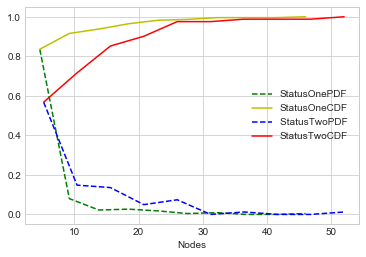

In [206]:
count,bin_edges = np.histogram(status_one["nodes"],bins=10 ,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf,"g--",label = "StatusOnePDF")
plt.plot(bin_edges[1:], cdf,"y",label="StatusOneCDF")



count,bin_edges = np.histogram(status_two["nodes"],bins=10 ,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf,"b--",label="StatusTwoPDF ")
plt.plot(bin_edges[1:], cdf,"r",label="StatusTwoCDF")
plt.legend()



plt.xlabel("Nodes")


plt.show()

Chances of Survival are Higher if Nodes<10, as you can see for nodes less than 10 status_one meaning chances of survival is upto 80% on the status one pdf 

In [207]:
print("Mean : Status One Nodes " + str(np.mean(status_one["nodes"])))
print("Mean : Status Two Nodes " + str(np.mean(status_two["nodes"])))

print("Standard Deviation : Status One Nodes " + str(np.std(status_one["nodes"])))
print("Standard Deviation : Status Two Nodes " + str(np.std(status_two["nodes"])))

Mean : Status One Nodes 2.7911111111111113
Mean : Status Two Nodes 7.45679012345679
Standard Deviation : Status One Nodes 5.857258449412131
Standard Deviation : Status Two Nodes 9.128776076761632


So people with less nodes mean are people of Status One,(people who can survive long)

People with a bit higher node mean are people who survive shorter(Status Two)


Meaning the spread is lower for status one, so if the mean was 2.79, there are 68% of points for one standard deviation away from the mean, since std_dev is lower there are a lot of data points close to 2.79 again increasing the chances for lesser number of nodes higher rate of survival(Status One)

In [208]:
print("Median for Status_One Long Survival: "+str(np.median(status_one["nodes"])))
print("Median for Status_Two Short Survival: "+str(np.median(status_two["nodes"])))

#Quantiles
print("90th percentile for Status_One Long Survival: "+str(np.percentile(status_one["nodes"],90)))
print("90th percentile for Status_Two Short Survival: "+str(np.percentile(status_two["nodes"],90)))


Median for Status_One Long Survival: 0.0
Median for Status_Two Short Survival: 4.0
90th percentile for Status_One Long Survival: 8.0
90th percentile for Status_Two Short Survival: 20.0


90th percentile makes more sense than the quantiles, because there are 90% of Long Survival people with 8 or less than 8 nodes,

where as 90% of short people had close to 20 or less nodes. The higher the nodes lower chances of long survival

[]

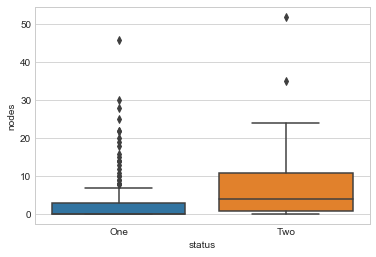

In [209]:
sns.boxplot(x="status",y = "nodes",data=hab)

plt.plot()

With the box plots it is easy to compare error ratios, if a ML model were to be trained on status two there could be a chance of 40-50% error ratio as the all points of status one fit to almost less than 50% of status two

The chances are low that a person belongs to status One, if the Nodes are greater than 10.
This graph gives a better insight for status one. There can be people with lesser nodes who can still belong to short survival list. 

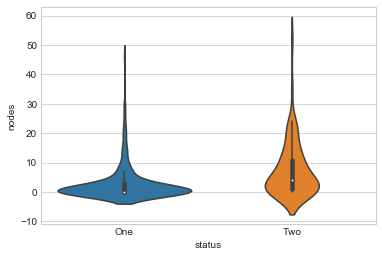

In [210]:
sns.violinplot(x="status", y="nodes", data=hab)
plt.show()

Status One has wider plot close to 0 meaning it is thicker for nodes close to 0. 
Nodes spread to a greater value for shorter survivals (status two)

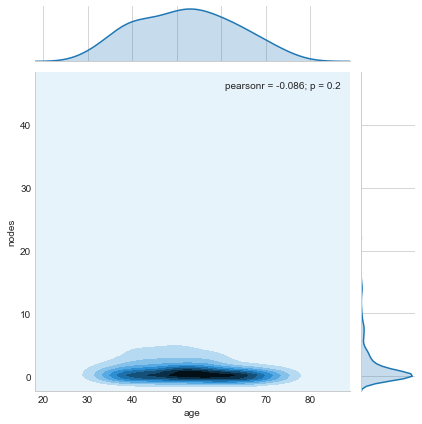

In [211]:
sns.jointplot(x="age",y="nodes",data=status_one,kind="kde")
plt.show()

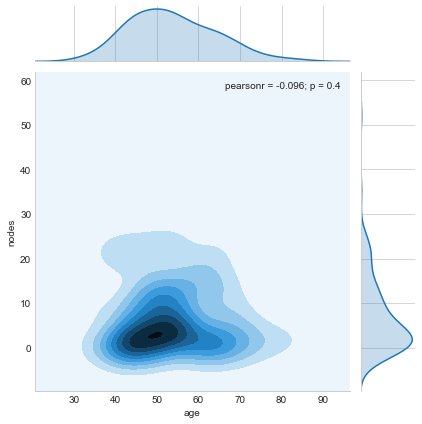

In [212]:
sns.jointplot(x="age",y="nodes",data=status_two,kind="kde")
plt.show()

This graph makes a bit more sense, so people of age group 45-55 have chances of falling into short survival if they have more nodes,eventhough there are rare cases of long survival. 

Long survival has lot of patient records between 40-70 years of age.
Short Survival have lot of records between 45-55 years of age.
